# Домашняя работа №1

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg

warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [2]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

In [20]:
h = x + 2 * y + 3 * z
h

array([5, 7])

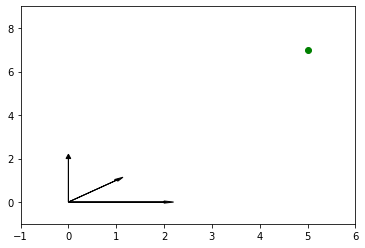

In [33]:
ax = plt.axes()

plt.xlim( [-1, 6] )
plt.ylim( [-1, 9] )

ax.arrow( 0, 0, x[0], x[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, y[0], y[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, z[0], z[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.scatter(h[0], h[1], c='g', marker='o')


plt.show()

In [60]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [64]:
cosine( x, y )

0.7071067811865475

In [62]:
cosine( x, z )

0.7071067811865475

## это для себя

In [39]:
a = np.array([1,1,4])
b = np.array([2, 0, 3])
c = np.array([0,2, 2])

In [53]:
u = a + 2 * b + 0.3 * c

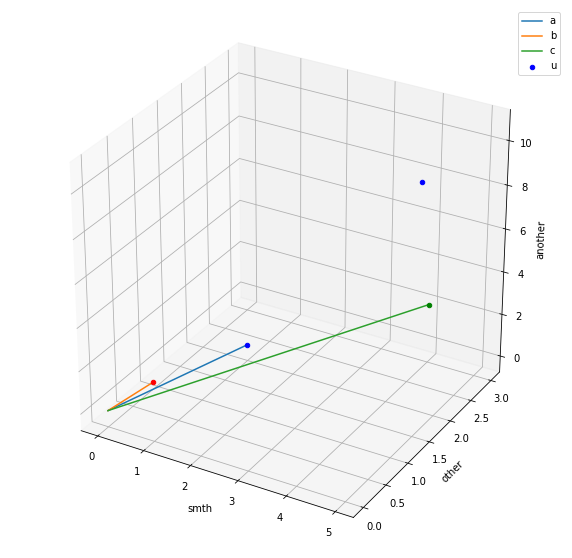

In [56]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')


ax.plot([0,a[0]], [0,b[0]], [0,c[0]])
ax.plot([0,a[1]], [0,b[1]], [0,c[1]])
ax.plot([0,a[2]], [0,b[2]], [0,c[2]])

ax.scatter(a[0], b[0], c[0], c='b', marker='o')
ax.scatter(a[1], b[1], c[1], c='r', marker='o')
ax.scatter(a[2], b[2], c[2], c='g', marker='o')

ax.scatter(u[0], u[1], u[2], c='b', marker='o')


ax.set_xlabel('smth')
ax.set_ylabel('other')
ax.set_zlabel('another')
ax.legend(['a', 'b', 'c', 'u'])

plt.show()

## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [73]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('data/joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

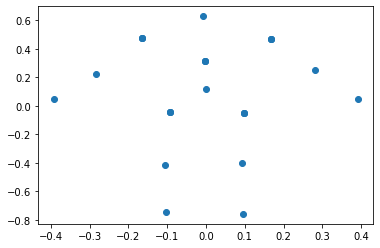

In [76]:
plt.scatter(df.x, df.y)

In [82]:
df

,type,x,y,z
21,v,-0.392414,0.045288,0.025403
20,v,-0.283883,0.219551,-0.024912
19,v,-0.163721,0.476657,-0.030335
18,v,-0.163721,0.476657,-0.030335
17,v,-0.163721,0.476657,-0.030335
7,v,-0.105431,-0.412672,-0.015059
8,v,-0.103304,-0.748699,-0.045038
22,v,-0.093564,-0.046249,-0.012199
5,v,-0.093564,-0.046249,-0.012199
6,v,-0.093564,-0.046249,-0.012199


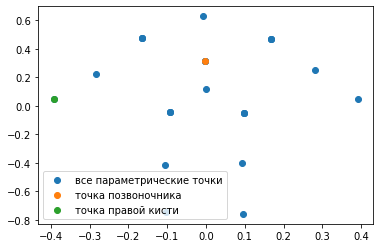

In [83]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[9], df.y[9])
plt.scatter(df.x[21], df.y[21])
plt.legend(['все параметрические точки', 'точка позвоночника', 'точка правой кисти'])

In [84]:
dist = math.sqrt(math.pow((df.x[9]-df.x[21]), 2) + math.pow((df.y[9]-df.y[21]), 2) + math.pow((df.z[9]-df.z[21]), 2))

In [85]:
print('Расстояние от точки позвоночника до правой кисти: ', dist)

Расстояние от точки позвоночника до правой кисти:  0.4728063976936014


# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и решение по алгоритму на бумажке). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [65]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [69]:
from numpy import linalg as LA

def get_eigenvalues(matrix_):
    e_vals, e_vecs = LA.eig(matrix_)
    print('Исходная матрица: \n', matrix_)

    print('Собственные вектора: \n', e_vecs)
    print('Собственные значения: ', e_vals)

In [70]:
get_eigenvalues(m1)

Исходная матрица: 
 [[2 2]
 [1 3]]
Собственные вектора: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
Собственные значения:  [1. 4.]


In [71]:
get_eigenvalues(m2)

Исходная матрица: 
 [[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Собственные вектора: 
 [[-0.57735027 -0.81649658  0.15430335]
 [-0.57735027  0.40824829  0.6172134 ]
 [ 0.57735027 -0.40824829  0.77151675]]
Собственные значения:  [6. 3. 3.]
